In [47]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
movies = pd.read_csv('https://raw.githubusercontent.com/mottaquikarim/PythonProgramming/master/raw_data/movies_rated.csv')

In [3]:
movies.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4


In [4]:
movies.tail()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic
74,L.A. Confidential,1997,R,Crime,138,13182281,8.3,9.9,9.0
75,Reservoir Dogs,1992,PG,Crime,99,255126,8.3,9.1,7.9
76,Indiana Jones and the Last Crusade,1989,R,Action,127,594442,8.3,8.8,6.5
77,For a Few Dollars More,1965,R,Western,132,32572577,8.3,9.4,7.4
78,The Hunt,2012,R,Drama,115,449102,8.3,9.4,7.7


In [5]:
movies.shape

(79, 9)

In [6]:
movies.dtypes

title                       object
year                         int64
content_rating              object
genre                       object
duration                     int64
gross                        int64
Internet Movie Database    float64
Rotten Tomatoes            float64
Metacritic                 float64
dtype: object

In [7]:
movies.index

RangeIndex(start=0, stop=79, step=1)

In [8]:
movies.columns

Index(['title', 'year', 'content_rating', 'genre', 'duration', 'gross',
       'Internet Movie Database', 'Rotten Tomatoes', 'Metacritic'],
      dtype='object')

In [9]:
movies.genre.unique().size

12

In [10]:
movies.genre.value_counts()

genre
Crime                  16
Drama                  14
Action                 11
Adventure               9
Drama                   7
Biography               5
Animation               5
Comedy                  4
Western                 3
Horror                  2
Mystery                 2
Comedy                  1
Name: count, dtype: int64

In [11]:
movies.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4


In [12]:
movies['Mean Rating'] = movies[['Internet Movie Database', 'Rotten Tomatoes', 'Metacritic']].mean(axis=1).round(2)
movies.loc[movies['content_rating'] == 'R'].sort_values(by='Mean Rating', ascending=False)[['title', 'Mean Rating']].head(1)

,title,Mean Rating
1,The Godfather,9.67


In [13]:
movies['Rotten Tomatoes'].mean().round(2)

9.09

In [14]:
# average rotten tomatoes rating for top 5 films
movies.sort_values(by='Rotten Tomatoes', ascending=False).head(5)['Rotten Tomatoes'].mean().round(2)

10.0

In [15]:
#What is the Five Number Summary like for top rated films as per IMDB?
movies.sort_values(by='Internet Movie Database', ascending=False).describe().round(2)

,year,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating
count,79.00,79.00,7.900000e+01,79.00,79.00,79.00,79.00
mean,1989.58,137.25,6.911975e+07,8.54,9.09,8.12,8.58
std,18.90,28.84,1.276363e+08,0.22,0.77,1.17,0.63
min,1936.00,81.00,1.918100e+04,8.30,7.10,5.50,7.03
25%,1979.50,115.50,8.564850e+05,8.40,8.70,7.35,8.25
50%,1995.00,136.00,1.535170e+06,8.50,9.30,8.20,8.70
75%,2002.00,153.50,9.809641e+07,8.60,9.70,9.00,9.07
max,2018.00,207.00,6.658453e+08,9.30,10.00,10.00,9.67


In [16]:
# Find the ratio between Rotten Tomato rating vs IMDB rating for all films. Update the dataframe to include a Ratings Ratio column (inplace).
movies['RT/IMDB'] = round(movies['Internet Movie Database'] / movies['Rotten Tomatoes'], 2)
movies.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating,RT/IMDB
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0,8.80,1.02
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0,9.67,0.94
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2,8.87,0.96
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0,9.23,0.93
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4,9.23,0.95


In [39]:
# Find the top 3 ratings ratio movies (rated higher on IMBD compared to Rotten Tomatoes)
movies.loc[movies['RT/IMDB'] > 1].sort_values(by='RT/IMDB', ascending=False).head(3)

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating,RT/IMDB
12,Forrest Gump,1994,PG-13,Drama,142,1401164,8.8,7.2,8.2,8.07,1.22
19,Interstellar,2014,PG-13,Adventure,169,315544750,8.6,7.1,7.4,7.70,1.21
42,The Intouchables,2011,R,Biography,112,1059654,8.5,7.4,5.7,7.20,1.15


In [41]:
# Find the bottom 3 ratings ratio movies (rated higher Rotten Tomatoes than IMDB)
movies.sort_values(by='RT/IMDB', ascending=True).head(3)

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating,RT/IMDB
63,Toy Story,1995,R,Animation,81,83471511,8.3,10.0,9.5,9.27,0.83
74,L.A. Confidential,1997,R,Crime,138,13182281,8.3,9.9,9.0,9.07,0.84
57,3 Idiots,2009,PG-13,Comedy,170,1136687,8.4,10.0,6.7,8.37,0.84


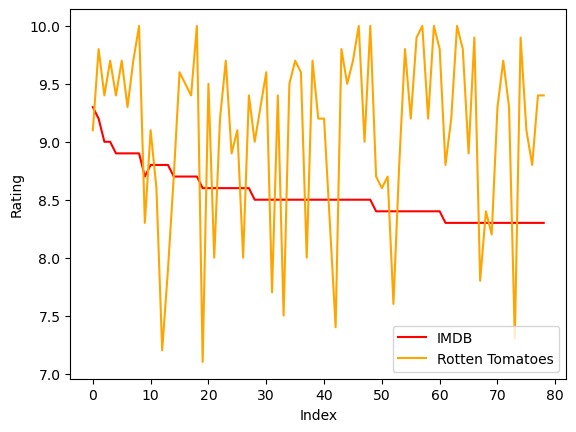

In [93]:
# What is the relationship between IMDB ratings and Rotten Tomato ratings?

plt.plot(movies.index, movies['Internet Movie Database'], label='IMDB', color='red')
plt.plot(movies.index, movies['Rotten Tomatoes'], label='Rotten Tomatoes', color='orange')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [97]:
movies.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating,RT/IMDB
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0,8.80,1.02
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0,9.67,0.94
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2,8.87,0.96
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0,9.23,0.93
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4,9.23,0.95


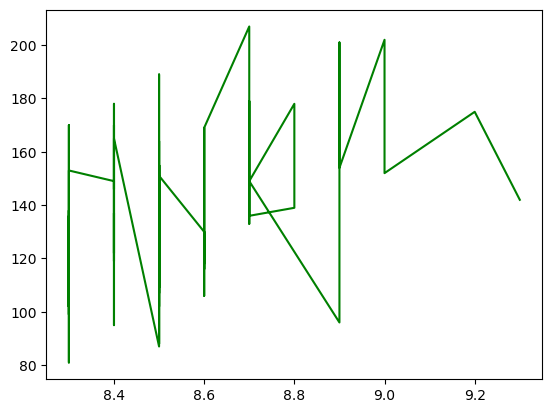

In [105]:
# What is the relationship between IMDB rating and movie duration?
plt.plot(movies['Internet Movie Database'], movies['duration'], color='Green')

<Axes: xlabel='genre'>

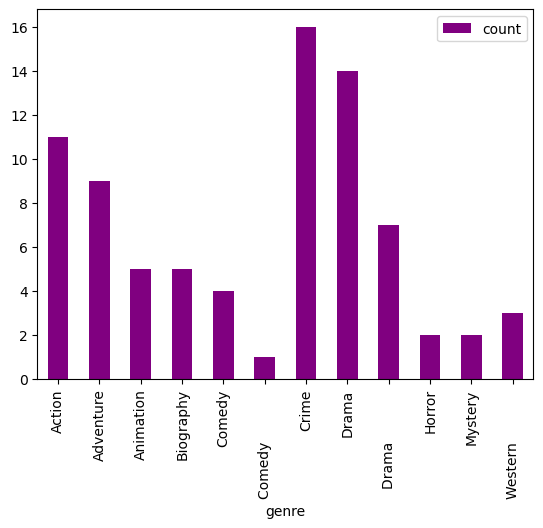

In [121]:
# How many movies are there in each genre category? (Remember to create a plot here)
movies.groupby('genre').size().reset_index(name='count').plot('genre', 'count', kind='bar', color='purple')

In [123]:
movies.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,Mean Rating,RT/IMDB
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0,8.80,1.02
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0,9.67,0.94
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2,8.87,0.96
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0,9.23,0.93
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4,9.23,0.95


<Axes: xlabel='No of Movies', ylabel='Rotten Tomatoes Rating'>

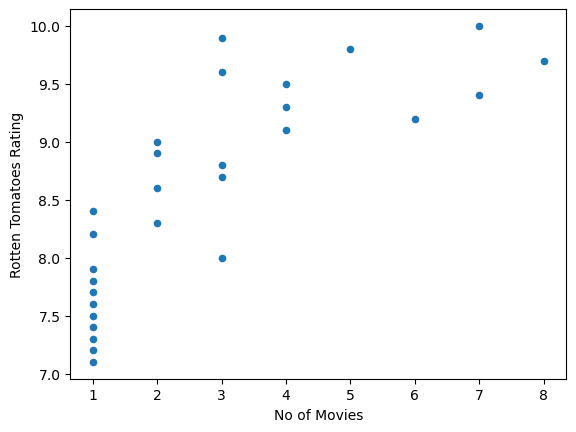

In [137]:
# What does the distribution of Rotten Tomatoes ratings look like?
movies.groupby('Rotten Tomatoes').size().reset_index(name='No of Movies').rename(
    columns={'Rotten Tomatoes': 'Rotten Tomatoes Rating'}
).plot('No of Movies', 'Rotten Tomatoes Rating', kind='scatter')

<Axes: ylabel='Frequency'>

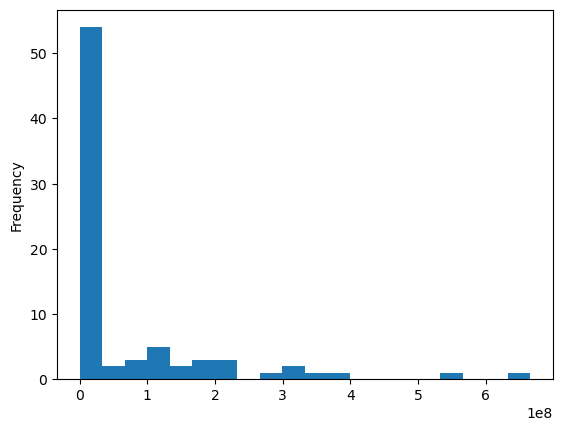

In [145]:
movies['gross'].plot(kind='hist', bins=20)